In [3]:
%pip -q install google-genai

In [4]:
# Configura a API Key do Google Gemini

import os
from google.colab import userdata

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

In [5]:
# Configura o cliente da SDK do Gemini

from google import genai

client = genai.Client()

MODEL_ID = "gemini-1.5-flash"

In [5]:
# Pergunta ao Gemini uma informação mais recente que seu conhecimento

from IPython.display import HTML, Markdown

# Perguntar pro modelo quando é a próxima imersão de IA ###############################################
resposta = client.models.generate_content(model=MODEL_ID,contents='quando é a proxima imersão de ia da alura?')

# Exibe a resposta na tela
display(Markdown(f"Resposta:\n {resposta.text}"))


Resposta:
 A próxima Imersão IA da Alura está prevista para acontecer de **15 a 21 de julho de 2024**.

Você pode encontrar mais informações e se inscrever no site oficial da Alura: [https://www.alura.com.br/imersao/ia](https://www.alura.com.br/imersao/ia)


In [6]:
# Pergunta ao Gemini uma informação utilizando a busca do Google como contexto

response = client.models.generate_content(model=MODEL_ID,
    contents='Quando é a próxima Imersão IA com Google Gemini da Alura?',
    config={"tools": [{"google_search":{}}]})

# Exibe a resposta na tela
display(Markdown(f"Resposta:\n {response.text}"))

Resposta:
 A última Imersão IA com Google Gemini da Alura ocorreu de 12 a 16 de maio de 2025. As inscrições para esta edição já estão encerradas.

Não tenho informações sobre as próximas edições, mas você pode verificar o site da Alura para futuras atualizações.


In [7]:
# Exibe a busca
print(f"Busca realizada: {response.candidates[0].grounding_metadata.web_search_queries}")
# Exibe as URLs nas quais ele se baseou
print(f"Páginas utilizadas na resposta: {', '.join([site.web.title for site in response.candidates[0].grounding_metadata.grounding_chunks])}")
print()
display(HTML(response.candidates[0].grounding_metadata.search_entry_point.rendered_content))

Busca realizada: ['próxima Imersão IA com Google Gemini da Alura']
Páginas utilizadas na resposta: starten.tech, youtube.com



In [6]:
# Instalar Framework ADK de agentes do Google ################################################
!pip install -q google-adk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.1/232.1 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.1/217.1 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.1/334.1 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.

In [7]:
!pip install Pillow transformers torch torchvision torchaudio google-cloud-aiplatform google-generativeai

print("Bibliotecas instaladas/verificadas.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [8]:
from google.adk.agents import Agent
from google.adk.runners import Runner
from google.adk.sessions import InMemorySessionService
from google.adk.tools import google_search
from google.genai import types  # Para criar conteúdos (Content e Part)
from datetime import date
import textwrap # Para formatar melhor a saída de texto
from IPython.display import display, Markdown # Para exibir texto formatado no Colab
import requests # Para fazer requisições HTTP
import warnings

warnings.filterwarnings("ignore")

In [9]:
# Função auxiliar que envia uma mensagem para um agente via Runner e retorna a resposta final
def call_agent(agent: Agent, message_text: str) -> str:
    # Cria um serviço de sessão em memória
    session_service = InMemorySessionService()
    # Cria uma nova sessão (você pode personalizar os IDs conforme necessário)
    session = session_service.create_session(app_name=agent.name, user_id="user1", session_id="session1")
    # Cria um Runner para o agente
    runner = Runner(agent=agent, app_name=agent.name, session_service=session_service)
    # Cria o conteúdo da mensagem de entrada
    content = types.Content(role="user", parts=[types.Part(text=message_text)])

    final_response = ""
    # Itera assincronamente pelos eventos retornados durante a execução do agente
    for event in runner.run(user_id="user1", session_id="session1", new_message=content):
        if event.is_final_response():
          for part in event.content.parts:
            if part.text is not None:
              final_response += part.text
              final_response += "\n"
    return final_response

In [10]:
# Função auxiliar para exibir texto formatado em Markdown no Colab
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [11]:
!pip install gTTS Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.0
    Uninstalling click-8.2.0:
      Successfully uninstalled click-8.2.0


API Key do Google configurada com sucesso usando genai.configure().
Instância do modelo 'gemini-1.5-flash-latest' criada com sucesso!
Por favor, carregue a imagem que você deseja audiodescrever.


Saving ibiuna_0040_ed4.jpg to ibiuna_0040_ed4 (2).jpg

Imagem 'ibiuna_0040_ed4 (2).jpg' carregada com sucesso!

--- Imagem Carregada ---


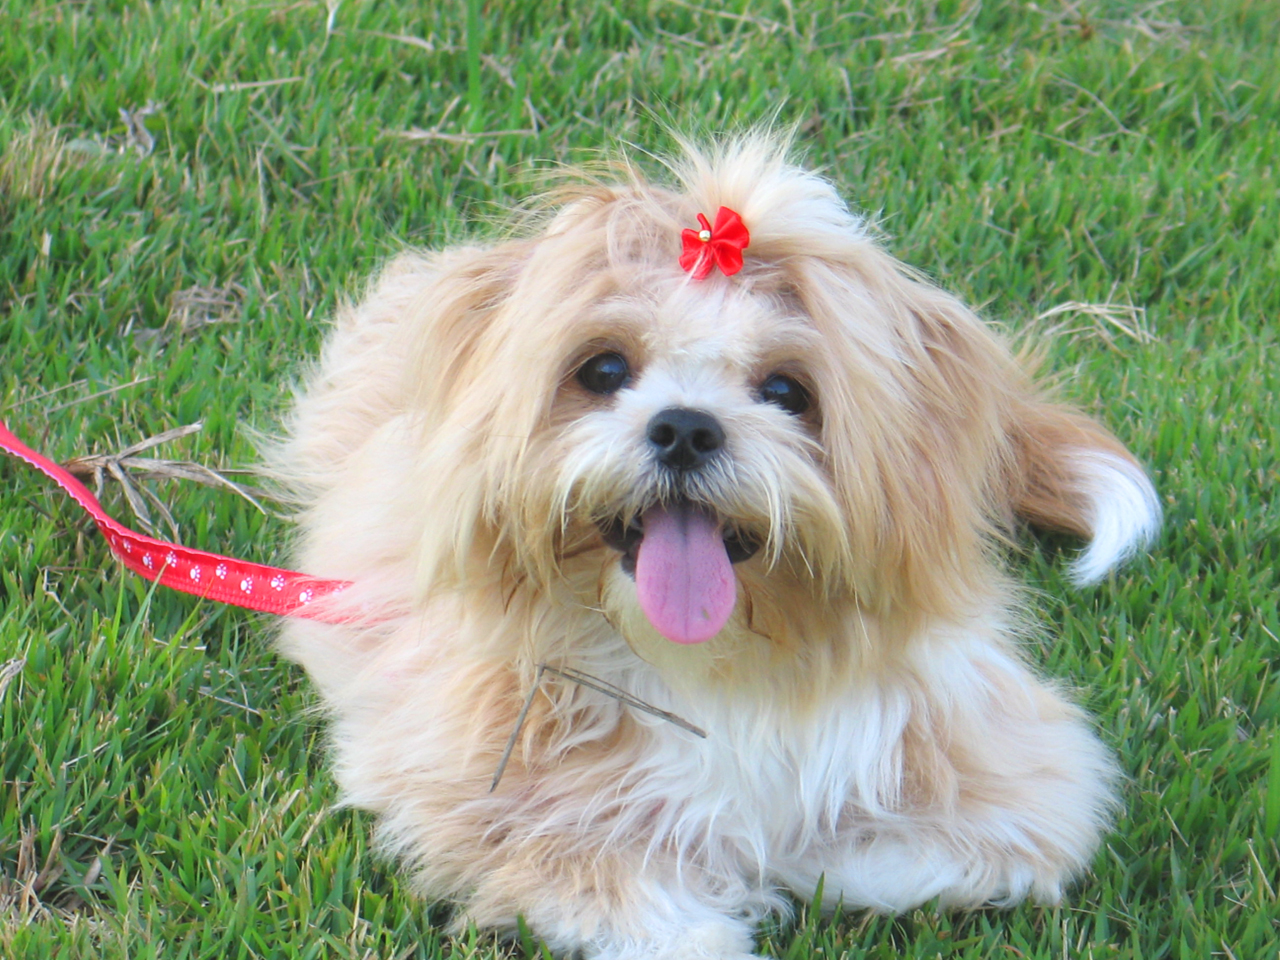

------------------------

Gerando audiodescrição da imagem...

--- Audiodescrição Gerada ---
Um cão pequeno de pelo longo e cor creme claro, com algumas partes mais brancas, está deitado na grama verde.  O animal possui uma pequena fita
vermelha com bolinhas brancas presas ao pelo, na parte superior da cabeça. Sua língua rosa está para fora, e ele parece relaxado.  Há um pedaço de
grama ou pequeno graveto perto do focinho do cão. Uma guia vermelha com pequenas patas brancas impressas está parcialmente visível, estendendo-se da
parte esquerda da imagem para trás do cão. A grama é curta, vibrante e uniformemente verde, com alguns fios secos e marrons esparsos. A iluminação é
suave e natural, criando uma atmosfera serena e calma.
----------------------------

Deseja gerar o áudio desta descrição? (s/n): s

Gerando áudio da descrição...
Áudio salvo como 'audiodescricao.mp3'


In [12]:
##############################################################################################################################
# -- gerar audiodescrição em texto e audio a partir de uma imagem de foto carregada pelo usuário Cego ou com baixa Visão --- #
##############################################################################################################################
# Importações necessárias no início do script
from google.colab import files
from PIL import Image
import io
import IPython.display as ip_display # Renomeado para evitar conflito com a função display
import textwrap # Para formatar melhor a saída de texto
import warnings
# Supondo que 'google.genai' e o modelo já foram configurados anteriormente.
# Exemplo: import google.generativeai as genai
# genai.configure(api_key="SUA_API_KEY") # Configuração da API Key
# model = genai.GenerativeModel('gemini-pro-vision') # ou o modelo que você está usando

# --- Configurações Iniciais ---
warnings.filterwarnings("ignore")

# (!! IMPORTANTE !!)
# Descomente e configure as linhas abaixo com sua API Key e o modelo desejado
import google.generativeai as genai
try:
  GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
  genai.configure(api_key=GOOGLE_API_KEY) # <<< DEVE FUNCIONAR AGORA com o import correto
  print("API Key do Google configurada com sucesso usando genai.configure().")
except Exception as e:
  print(f"Erro ao configurar o modelo Generativo: {e}")
  print("Por favor, configure sua API Key e o modelo para continuar.")
  model = None # Define model como None para evitar erros posteriores se a configuração falhar

# Crie a instância do modelo
MODEL_ID = "gemini-1.5-flash-latest" # Seu ID de modelo
model = genai.GenerativeModel(model_name=MODEL_ID) # <<< DEVE FUNCIONAR AGORA
print(f"Instância do modelo '{MODEL_ID}' criada com sucesso!")

# --- Agente 1 para Carregar a Imagem ---
def carregar_e_exibir_imagem():
    """
    Solicita o upload de uma imagem no Google Colab,
    exibe a imagem e a retorna como um objeto PIL.Image.
    """
    print("Por favor, carregue a imagem que você deseja audiodescrever.")
    uploaded = files.upload()

    if not uploaded:
        print("\nNenhuma imagem foi carregada. Por favor, rode a célula novamente e carregue uma imagem.")
        return None, None
    else:
        # Pega o nome do primeiro arquivo carregado
        file_name = next(iter(uploaded))
        print(f"\nImagem '{file_name}' carregada com sucesso!")

        # Prepara e exibe a imagem carregada
        img_data = uploaded[file_name]
        img_pil = Image.open(io.BytesIO(img_data))

        print("\n--- Imagem Carregada ---")
        ip_display.display(img_pil) # Usando ip_display para evitar conflito
        print("------------------------")
        return img_pil, file_name

# --- Agente 2 - para Gerar Audiodescrição ---
def gerar_audiodescricao_da_imagem(modelo, imagem_pil, prompt):
    """
    Gera a audiodescrição para uma imagem fornecida usando um modelo generativo.

    Args:
        modelo: O modelo generativo configurado (ex: Gemini).
        imagem_pil: A imagem carregada como um objeto PIL.Image.
        prompt: O prompt detalhado para guiar a geração da audiodescrição.

    Returns:
        A string da audiodescrição gerada ou None se ocorrer um erro.
    """
    if modelo is None:
        print("\nO modelo generativo não foi configurado. Não é possível gerar a audiodescrição.")
        return None
    if imagem_pil is None:
        print("\nNenhuma imagem fornecida para gerar audiodescrição.")
        return None

    print("\nGerando audiodescrição da imagem...")
    try:
        response = modelo.generate_content([prompt, imagem_pil])

        if response.candidates and response.candidates[0].content.parts:
            audiodescricao_texto = response.candidates[0].content.parts[0].text
            return audiodescricao_texto
        else:
            print("\nNão foi possível gerar a audiodescrição. A resposta do modelo está vazia ou malformada.")
            print("Detalhes da resposta:", response)
            return None
    except Exception as e:
        print(f"\nOcorreu um erro durante a geração da audiodescrição: {e}")
        return None

# --- Agente 3 - (Opcional) para Gerar Áudio da Descrição ---
def gerar_audio_da_descricao(texto_descricao, idioma='pt', nome_arquivo="audiodescricao.mp3"):
    """
    Converte o texto da audiodescrição em um arquivo de áudio MP3.

    Args:
        texto_descricao: A string da audiodescrição.
        idioma: O idioma para a síntese de voz (padrão 'pt').
        nome_arquivo: O nome do arquivo MP3 a ser salvo (padrão 'audiodescricao.mp3').
    """
    if not texto_descricao:
        print("\nNenhum texto de descrição fornecido para gerar áudio.")
        return

    try:
        # Tenta importar gTTS aqui para não ser um requisito rígido se não for usado
        from gtts import gTTS
        print("\nGerando áudio da descrição...")
        tts = gTTS(text=texto_descricao, lang=idioma, slow=False)
        tts.save(nome_arquivo)
        print(f"Áudio salvo como '{nome_arquivo}'")
        ip_display.display(ip_display.Audio(nome_arquivo)) # Usando ip_display
    except ImportError:
        print("\nPara gerar áudio, a biblioteca gTTS é necessária.")
        print("Você pode instalá-la executando: !pip install gTTS")
    except Exception as e_tts:
        print(f"\nErro ao gerar áudio: {e_tts}")
        print("A geração de áudio é opcional. A descrição em texto foi gerada com sucesso.")

# --- Fluxo Principal do Programa ---
def main():
    """
    Função principal para orquestrar o carregamento da imagem e a geração da audiodescrição.
    """
    # (Certifique-se de que a variável 'model' está configurada no início do script)
    if 'model' not in globals() or model is None:
        print("ERRO CRÍTICO: A variável 'model' não foi definida ou configurada.")
        print("Por favor, descomente e configure a inicialização do modelo no início do script.")
        return

    # 1. Agente para carregar a imagem
    imagem_pil, nome_arquivo = carregar_e_exibir_imagem()

    if imagem_pil:
        # 2. Definir o prompt para o agente de audiodescrição
        prompt_audiodescricao = """
        Você é um audiodescritor profissional para pessoas cegas ou com baixa visão.
        Descreva a imagem a seguir em detalhes vívidos e objetivos. Concentre-se nos seguintes aspectos:
        1.  **Cena Geral:** Qual é o tema principal ou a configuração da imagem? Onde parece estar acontecendo?
        2.  **Elementos Principais:** Quais são os objetos, pessoas ou animais mais proeminentes? Descreva suas aparências, roupas (se aplicável), posições e expressões.
        3.  **Ações e Interações:** O que está acontecendo na imagem? As pessoas ou animais estão interagindo? Se sim, como?
        4.  **Contexto e Atmosfera:** Quais cores predominam? Qual é a iluminação? A imagem transmite alguma emoção ou atmosfera específica (alegria, tristeza, mistério, etc.)?
        5.  **Detalhes Relevantes:** Inclua detalhes menores que possam ser importantes para a compreensão completa da imagem, como texturas, padrões ou elementos de fundo significativos.
        Evite interpretações subjetivas ou opiniões pessoais. Forneça uma descrição clara e concisa, como se estivesse narrando a cena para alguém que não pode vê-la.
        Comece a descrição diretamente, sem frases introdutórias como "Esta imagem mostra...".
        Defina o sequenciamento da descrição dos elementos, sendo priorizado de cima para baixo e da esquerda para a direita.
        """

        # 3. Agente para gerar a audiodescrição
        audiodescricao_texto = gerar_audiodescricao_da_imagem(model, imagem_pil, prompt_audiodescricao)

        if audiodescricao_texto:
            print("\n--- Audiodescrição Gerada ---")
            # Usando textwrap para formatar a saída para melhor leitura
            wrapped_text = textwrap.fill(audiodescricao_texto, width=150) # Ajuste width conforme necessário
            print(wrapped_text)
            # ip_display.display(ip_display.Markdown(audiodescricao_texto)) # Outra forma de exibir, se preferir Markdown
            print("----------------------------")

            # 4. (Opcional) Agente para gerar áudio da descrição
            # Perguntar ao usuário se deseja gerar o áudio
            gerar_audio_agora = input("\nDeseja gerar o áudio desta descrição? (s/n): ").strip().lower()
            if gerar_audio_agora == 's':
                gerar_audio_da_descricao(audiodescricao_texto)
            else:
                print("\nGeração de áudio pulada.")
    else:
        print("\nProcesso interrompido pois nenhuma imagem foi carregada ou houve um erro no carregamento.")

# --- Executar o programa ---
if __name__ == "__main__":
    # Esta verificação __name__ == "__main__" é padrão em scripts Python,
    # mas em notebooks Colab, você pode simplesmente chamar main() diretamente.
    # No Colab, você chamaria a função main() assim:
    # main()
    # No entanto, para que funcione colando diretamente na célula,
    # é melhor chamar main() sem o if, ou garantir que o model está configurado.

    # Exemplo de como você chamaria no Colab (após configurar o 'model'):
    if 'model' in globals() and model is not None:
         main()
    else:
         print("Por favor, configure o modelo generativo (descomente e edite as linhas de configuração no início do script) antes de rodar 'main()'.")